# SSIM

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

from PIL import Image

# Create a Ok image

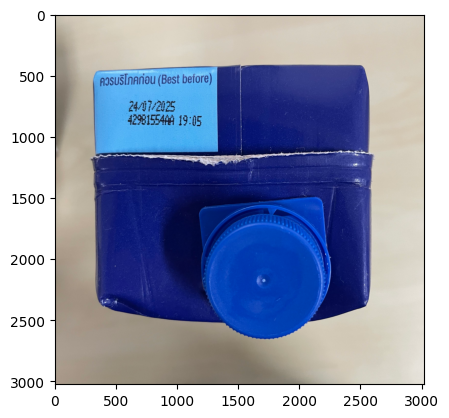

In [49]:
ok_img = cv2.imread('../data/large/image_good.png')
plt.imshow(ok_img[:,:,::-1])

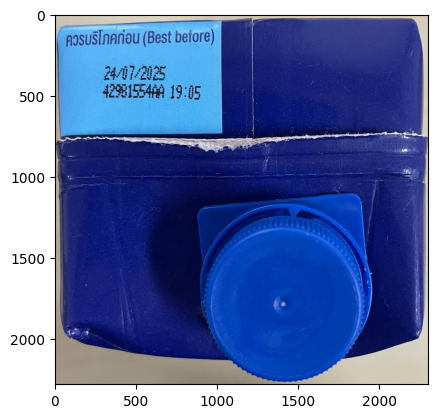

In [50]:
croppeed_region = ok_img[390:2670, 300:2600]
plt.imshow(croppeed_region[:,:,::-1])

In [51]:
cv2.imwrite('../data/large/ok_image.png', croppeed_region)

True

# Load Defected Model as Gray-scale

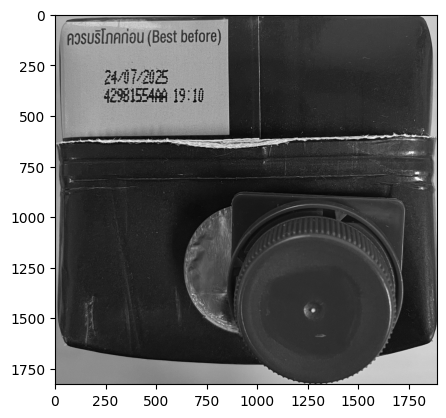

In [52]:
defected_model = cv2.imread('../data/large/defected_model.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(defected_model, cmap='gray')

In [53]:
h, w = defected_model.shape
h, w

(1827, 1888)

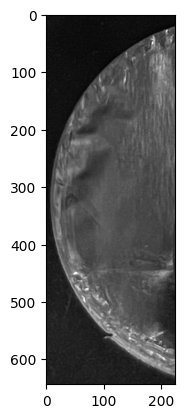

In [60]:
defected = defected_model[h//2+20:h-250, h//3+20:h//2-60]
plt.imshow(defected, cmap='gray')

In [61]:
cv2.imwrite('../template/defected_template.png', defected_model)

True

# Load Test Image as Gray-scale

In [45]:
ok_test = cv2.imread('../data/large/ok_image.png', cv2.IMREAD_GRAYSCALE)
ng_test = cv2.imread('../data/large/cropped_test.jpg', cv2.IMREAD_GRAYSCALE)

[ WARN:0@469.946] global loadsave.cpp:241 findDecoder imread_('../data/large/cropped_test.jpg'): can't open/read file: check file path/integrity


# Histogram Equalization

Equalizes the brightness distribution, making the images more consistent

In [46]:
# Resize the images
size = (512, 512)
defected_model = cv2.resize(defected_model, size, cv2.INTER_AREA)
ok_test = cv2.resize(ok_test, size, cv2.INTER_AREA)
ng_test = cv2.resize(ng_test, size, cv2.INTER_AREA)

# equalized_defected_model = cv2.equalizeHist(defected_model)
# equalized_ok_test = cv2.equalizeHist(ok_test)
# equalized_ng_test = cv2.equalizeHist(ng_test)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [393]:
# # Calculate histograms
# hist_defected_model = cv2.calcHist([equalized_defected_model], [0], None, [256], [0, 256])
# hist_ng_test = cv2.calcHist([equalized_ng_test], [0], None, [256], [0, 256])
# hist_ok_test = cv2.calcHist([equalized_ok_test], [0], None, [256], [0, 256])

# plt.figure(figsize=(12, 6))
# plt.subplot(321)
# plt.imshow(equalized_defected_model, cmap='gray')
# plt.title("Defected Image")
# plt.subplot(322)
# plt.plot(hist_defected_model, color='blue')
# plt.title("Histogram (Defected Image)")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")

# plt.subplot(323)
# plt.imshow(equalized_ng_test, cmap='gray')
# plt.title("NG-Test Image")
# plt.subplot(324)
# plt.plot(hist_ng_test, color='blue')
# plt.title("Histogram (Test Image)")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")

# plt.subplot(325)
# plt.imshow(equalized_ok_test, cmap='gray')
# plt.title("OK-Test Image")
# plt.subplot(326)
# plt.plot(hist_ok_test, color='blue')
# plt.title("Histogram (Test Image)")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")

# plt.tight_layout()
# plt.show()

# Remove Luminance

In [394]:
def remove_luminance_contrast(img):
    """
    Normalize an image to have zero mean and unit variance, removing luminance and contrast.
    """
    img = img.astype(np.float32)  # Ensure the image is in float format
    img -= np.mean(img)           # Subtract mean to remove luminance
    img /= (np.std(img) + 1e-8)   # Divide by standard deviation to remove contrast
    return img

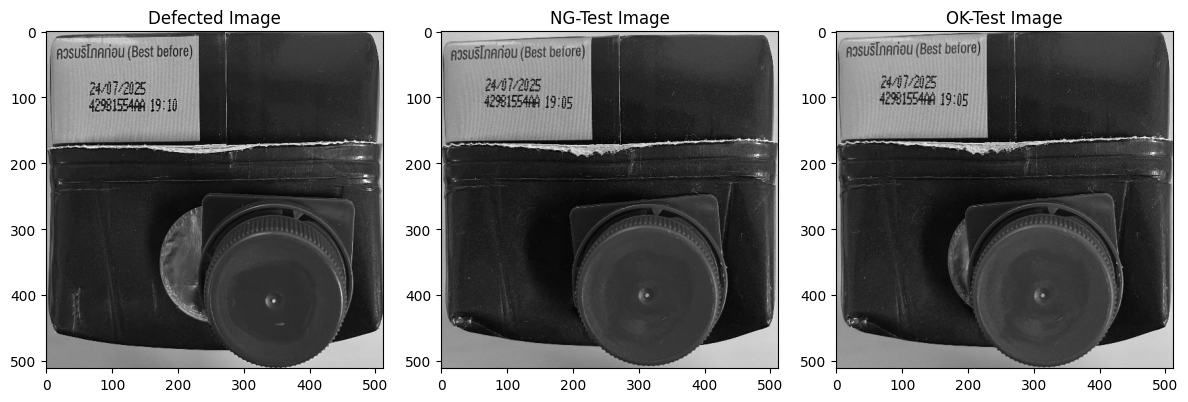

In [395]:
# Preprocess images to remove luminance and contrast
defected_model = remove_luminance_contrast(defected_model)
ok_test = remove_luminance_contrast(ok_test)
ng_test = remove_luminance_contrast(ng_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(defected_model, cmap='gray')
plt.title("Defected Image")

plt.subplot(1, 3, 2)
plt.imshow(ok_test, cmap='gray')
plt.title("NG-Test Image")

plt.subplot(1, 3, 3)
plt.imshow(ng_test, cmap='gray')
plt.title("OK-Test Image")

plt.tight_layout()
plt.show()

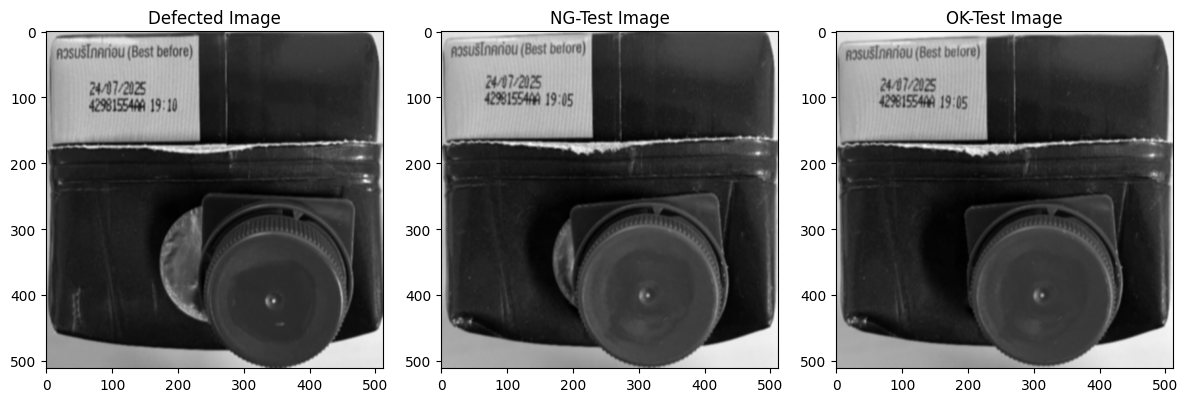

In [ ]:
# Blur images
equalized_defected_model = cv2.GaussianBlur(defected_model, (5, 7), 0)
equalized_ok_test = cv2.GaussianBlur(ok_test, (5, 7), 0)
equalized_ng_test = cv2.GaussianBlur(ng_test, (5, 7), 0)

# # Convert to binary
# _, equalized_defected_model = cv2.threshold(equalized_defected_model, 70, 255, cv2.THRESH_BINARY)
# _, equalized_ok_test = cv2.threshold(equalized_ok_test, 70, 255, cv2.THRESH_BINARY)
# _, equalized_ng_test = cv2.threshold(equalized_ng_test, 70, 255, cv2.THRESH_BINARY)

# equalized_defected_model = equalized_defected_model[size[1]//2::, :]
# equalized_ok_test = equalized_ok_test[size[1]//2::, :]
# equalized_ng_test = equalized_ng_test[size[1]//2::, :]


plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(equalized_defected_model, cmap='gray')
plt.title("Defected Image")

plt.subplot(1, 3, 2)
plt.imshow(equalized_ng_test, cmap='gray')
plt.title("NG-Test Image")

plt.subplot(1, 3, 3)
plt.imshow(equalized_ok_test, cmap='gray')
plt.title("OK-Test Image")

plt.tight_layout()
plt.show()

SSIM Score: 0.5896186466157647


Text(0.5, 0.98, 'SSIM: 0.5896186466157647')

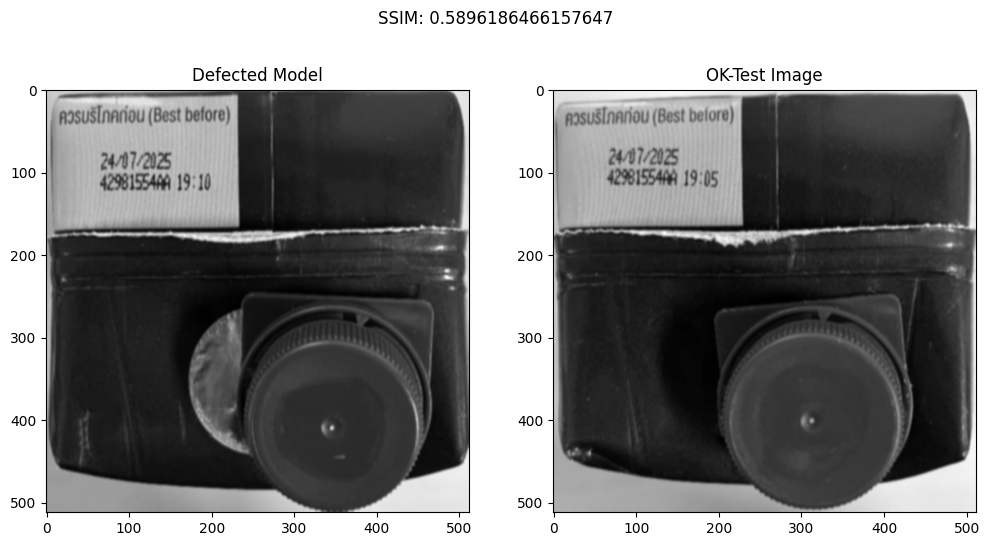

In [397]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

# Set luminance weight (K1) close to zero
score, diff = ssim(equalized_defected_model, equalized_ok_test, full=True, gaussian_weights=True, data_range=equalized_defected_model.max() - equalized_defected_model.min(), K1=1e-8)
print(f"SSIM Score: {score}")

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Defected Model")
plt.imshow(equalized_defected_model, cmap='gray')

plt.subplot(122)
plt.title("OK-Test Image")
plt.imshow(equalized_ok_test, cmap='gray')

plt.suptitle(f"SSIM: {score}")

SSIM Score: 0.5750084967371527


Text(0.5, 0.98, 'SSIM: 0.5750084967371527')

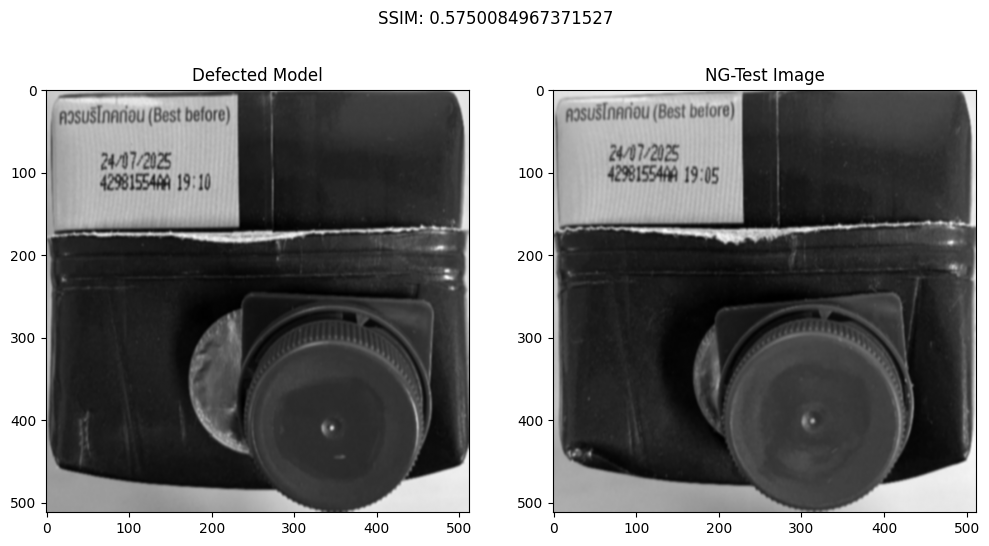

In [398]:
# Set luminance weight (K1) close to zero
score, diff = ssim(equalized_defected_model, equalized_ng_test, full=True, gaussian_weights=True, data_range=equalized_defected_model.max() - equalized_defected_model.min(), K1=1e-8)
print(f"SSIM Score: {score}")

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Defected Model")
plt.imshow(equalized_defected_model, cmap='gray')

plt.subplot(122)
plt.title("NG-Test Image")
plt.imshow(equalized_ng_test, cmap='gray')

plt.suptitle(f"SSIM: {score}")

In [399]:
equalized_defected_model.shape

(512, 512)

In [400]:
# ORB Feature Detector
orb = cv2.ORB_create()

# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(equalized_defected_model, None)
kp2, des2 = orb.detectAndCompute(equalized_ok_test, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_img = cv2.drawMatches(equalized_defected_model, kp1, equalized_ok_test, kp2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matched_img)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


: 

In [365]:
def remove_shadows(gray, ksize=(5, 5)):
    """
    Removes shadows from an input image while preserving sharpness.
    
    Args:
        image (numpy.ndarray): Input image as a NumPy array (gray format).
    
    Returns:
        numpy.ndarray: Image with shadows removed and sharpness preserved.
    """
    # Convert the image to grayscale
    # Perform morphological operations to extract the shadow
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)  # Adjust kernel size as needed
    background = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

    # Subtract the shadow (background) from the grayscale image
    shadow_free = cv2.subtract(gray, background)

    # # Normalize the image for better contrast
    # normalized = cv2.normalize(shadow_free, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # # Apply Gaussian smoothing to even out the illumination
    # smoothed = cv2.GaussianBlur(normalized, ksize, 0)

    # # Enhance sharpness using an unsharp mask
    # sharp = cv2.addWeighted(normalized, 1.5, smoothed, -0.5, 0)

    # # Convert back to BGR to maintain consistency
    # result = cv2.merge([sharp, sharp, sharp])

    return background

In [366]:
def pre_process(image, ksize=(5,5)):
    # Convert the image to grayscale
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Remove shadows from the image
    image = remove_shadows(image, ksize)
    # Threshold the image to create a binary mask
    ret, bin_image = cv2.threshold(image, 60, 250, cv2.THRESH_BINARY)
    return bin_image, image

(np.float64(-0.5), np.float64(1887.5), np.float64(1826.5), np.float64(-0.5))

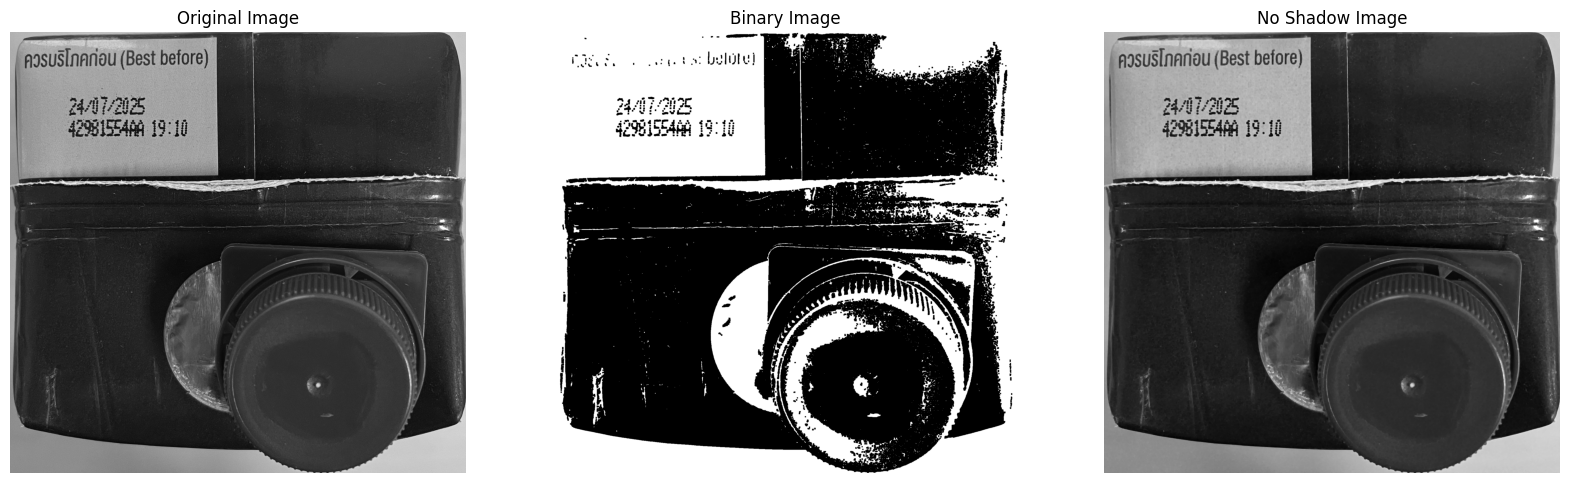

In [ ]:
# defected_model = Image.open('../data/large/defected_model.jpg').convert('L')
defected_model = cv2.imread('../data/large/defected_model.jpg', cv2.IMREAD_GRAYSCALE)
# defected_model = np.array(defected_model)

res_image = pre_process(defected_model)

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(defected_model, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Binary Image')
plt.imshow(res_image[0], cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('No Shadow Image')
plt.imshow(res_image[1], cmap='gray')
plt.axis('off')

                                    

# Defect Test

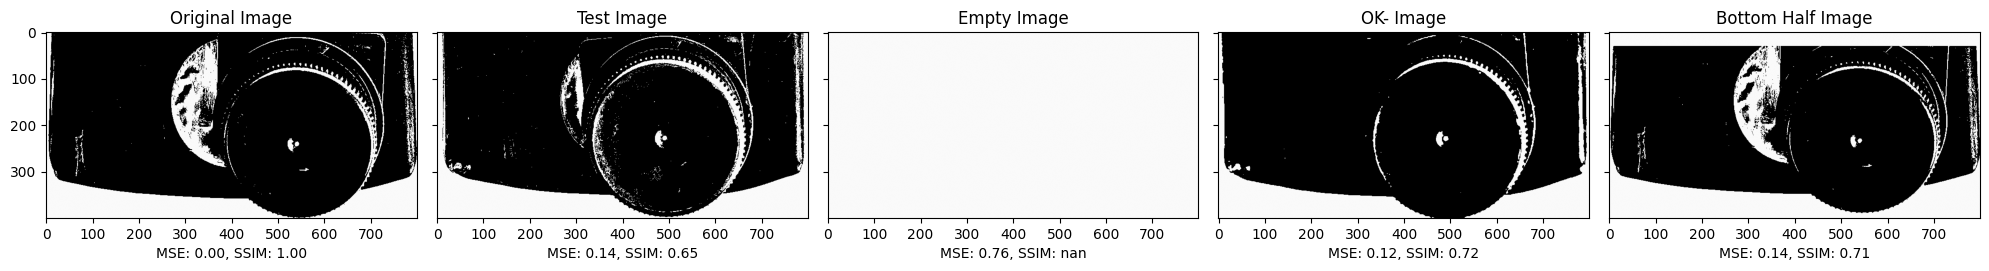

In [ ]:
# Load model image
model = cv2.resize(cv2.imread('../data/large/defected_model.jpg'), (800, 800))
model_gray = cv2.cvtColor(model, cv2.COLOR_BGR2GRAY)
ret, model_binary = cv2.threshold(model_gray, 75, 250, cv2.THRESH_BINARY)
# Divide half of the image
model_img = img_as_float(model_binary)[400:800, 0:800]

# Load test image
test = cv2.resize(cv2.imread('../data/large/cropped_test.jpg'), (800, 800))
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
ret, test_binary = cv2.threshold(test_gray, 75, 250, cv2.THRESH_BINARY)
test_img = img_as_float(test_binary)[400:800, 0:800]

# Load empty image
empty = cv2.resize(cv2.imread('../data/large/Empty.jpg'), (800, 800))
empty_gray = cv2.cvtColor(empty, cv2.COLOR_BGR2GRAY)
ret, empty_binary = cv2.threshold(empty_gray, 75, 250, cv2.THRESH_BINARY)
empty_img = img_as_float(empty_binary)[400:800, 0:800]

# Load top ok image
top_half = cv2.resize(cv2.imread('../data/large/image.png'), (800, 800))
top_half_gray = cv2.cvtColor(top_half, cv2.COLOR_BGR2GRAY)
ret, top_half_binary = cv2.threshold(top_half_gray, 75, 250, cv2.THRESH_BINARY)
top_half_img = img_as_float(top_half_binary)[400:800, 0:800]

# Load bottom half image
bottom_half = cv2.resize(cv2.imread('../data/large/Bottom_Half.jpg'), (800, 800))
bottom_half_gray = cv2.cvtColor(bottom_half, cv2.COLOR_BGR2GRAY)
ret, bottom_half_binary = cv2.threshold(bottom_half_gray, 75, 250, cv2.THRESH_BINARY)
bottom_half_img = img_as_float(bottom_half_binary)[400:800, 0:800]

# Create plots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharex=True, sharey=True)
ax = axes.ravel()

# Calculate metrics
mse_none = mean_squared_error(model_img, model_img)
ssim_none_value = ssim(model_img, model_img, data_range=model_img.max() - model_img.min())

mse_test = mean_squared_error(model_img, test_img)
ssim_test_value = ssim(model_img, test_img, data_range=test_img.max() - test_img.min())

mse_empty = mean_squared_error(model_img, empty_img)
ssim_empty_value = ssim(model_img, empty_img, data_range=empty_img.max() - empty_img.min())

mse_top_half = mean_squared_error(model_img, top_half_img)
ssim_top_half_value = ssim(model_img, top_half_img, data_range=top_half_img.max() - top_half_img.min())

mse_bottom_half = mean_squared_error(model_img, bottom_half_img)
ssim_bottom_half_value = ssim(model_img, bottom_half_img, data_range=bottom_half_img.max() - bottom_half_img.min())


# Display images and metrics
ax[0].imshow(model_img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none_value:.2f}')
ax[0].set_title('Original Image')

ax[1].imshow(test_img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_test:.2f}, SSIM: {ssim_test_value:.2f}')
ax[1].set_title('Test Image')

ax[2].imshow(empty_img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_empty:.2f}, SSIM: {ssim_empty_value:.2f}')
ax[2].set_title('Empty Image')

ax[3].imshow(top_half_img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[3].set_xlabel(f'MSE: {mse_top_half:.2f}, SSIM: {ssim_top_half_value:.2f}')
ax[3].set_title('OK- Image')

ax[4].imshow(bottom_half_img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[4].set_xlabel(f'MSE: {mse_bottom_half:.2f}, SSIM: {ssim_bottom_half_value:.2f}')
ax[4].set_title('Bottom Half Image')

plt.tight_layout()
plt.show()

# 